## Assignment 2

**Submission deadlines:** 
- get at least 4 points by Tuesday, 23.03.2021
- remaining points: last lab session before or on Tuesday, 13.04.2021 (02.04.2021 – 06.04.2021 there is Easter break)

**Points:** Aim to get 16 out of 20+ possible points

## Submission instructions
The class is held remotely. To submit your solutions please show the notebook over the video call. Make sure you know all the questions and answers, and that the notebook contains results (before presentation do `Runtime -> Restart and run all`)

We provide starter code, however, you are not required to use it as long as you properly solve the tasks.

As always, please submit corrections using GitHub's Pull Requests to https://github.com/janchorowski/dl_uwr.

# Problems

## Problem 1 [1p]:

Let's see why GPUs are useful in deep learning. Compare matrix multiplication speed for a few matrix shapes when implemented:
1. as loops in Python
2. using np.einsum
3. using numpy on CPU
4. using pytorch on CPU
5. using pytorch on GPU

Finally, consider two square matrices, $A$ and $B$. We have 4 possibilities of multiplying them or their transpositions:
1. $AB$
2. $A^TB$
3. $AB^T$
4. $A^TB^T$

Which option is the fastest? Why?

### as loops in Python

In [ ]:
A_n = 2
A_m = 3
B_n = 3
B_m = 4

In [ ]:
import random
def vanilla_random_matrix(n, m):
  return [[random.random() for _ in range(m)] for _ in range(n)]

def vanilla_multiply_matrices(A: list, B: list):
  n = len(A)
  m = len(B[0])
  result = [([0.0] * m) for i in range(n)]

  for i in range(n):
    for j in range(m):
      for k in range(len(A[0])):
        result[i][j] += A[i][k] * B[k][j]

  return result

In [ ]:
A = vanilla_random_matrix(A_n, A_m)
B = vanilla_random_matrix(B_n, B_m)
print(A)
print(B)

print(vanilla_multiply_matrices(A, B))

A = [[1, 0, 2],
     [-1, 3, 1]]

B = [[3, 1],
     [2, 1],
     [1, 0],]
print(vanilla_multiply_matrices(A, B) == [[5, 1], [4, 2]])

[[0.02838876685568159, 0.7395057758128302, 0.6308965625080917], [0.21870538524997407, 0.7977992550515304, 0.3623535274148785]]
[[0.3021516245475605, 0.18162114169288124, 0.7811050885839188, 0.13029904497867228], [0.7988244403877078, 0.145516905384238, 0.7392055245612029, 0.19456563813736394], [0.4564598934440375, 0.707307736076526, 0.8042948932565341, 0.6514598340784253]]
[[0.8872919772481609, 0.5590046115836959, 1.0762482485737177, 0.5585852123188775], [0.8687835834217152, 0.41211025361159187, 1.0520085977976428, 0.4197801928418077]]
True


### using np.einsum

In [ ]:
import numpy as np

def numpy_random_matrix(n, m):
  return np.random.rand(n, m)

def numpy_einsum_multiply_matrices(A: np.array, B: np.array):
  return np.einsum('ij,jk->ik', A, B)

In [ ]:
A = numpy_random_matrix(A_n, A_m)
B = numpy_random_matrix(B_n, B_m)
print(A)
print(B)

print(numpy_einsum_multiply_matrices(A, B))

[[0.64031874 0.60382743 0.88067315]
 [0.19430791 0.11447503 0.94553395]]
[[0.32116278 0.65399402 0.94707703 0.01124013]
 [0.67791953 0.25028626 0.49969212 0.3107971 ]
 [0.85889602 0.28393674 0.79607651 0.54426433]]
[[1.37139962 0.8199498  1.60924219 0.67418406]
 [0.95212467 0.42419957 0.9939442  0.55238296]]


In [ ]:
# A = np.array([0, 1, 2])

# B = np.array([[ 0,  1,  2,  3],
#               [ 4,  5,  6,  7],
#               [ 8,  9, 10, 11]])

# print(A)
# print(A[:])
# print(A[:, np.newaxis])

# print()

# print(A[:, np.newaxis] * B)
# print((A[:, np.newaxis] * B).sum(0))

# A = np.array([
#               [0, 1, 2],
#               [0, 1, 2]
#               ])

# print()
# print(A[:])
# print(A * B)
# print((A * B).sum(0))

In [ ]:
# A = np.array([[1, 0, 2],
#      [-1, 3, 1]])

# B = np.array([[3, 1],
#      [2, 1],
#      [1, 0],])

# A_n = 2
# A_m = 3
# B_n = 3
# B_m = 4

### using numpy on CPU

In [ ]:
def numpy_multiply_matrices(A: np.array, B: np.array):
  return np.matmul(A, B)

In [ ]:
# print(numpy_multiply_matrices(A, B))

[[1.37139962 0.8199498  1.60924219 0.67418406]
 [0.95212467 0.42419957 0.9939442  0.55238296]]


### using pytorch on CPU

In [ ]:
import torch

def pytorch_cpu_random_matrix(n, m):
  return torch.rand(n, m)

def pytorch_cpu_multiply_matrices(A: torch.Tensor, B: torch.Tensor):
  return torch.matmul(A, B)

In [ ]:
A = pytorch_cpu_random_matrix(A_n, A_m)
B = pytorch_cpu_random_matrix(B_n, B_m)
print(A)
print(B)

print(pytorch_multiply_matrices(A, B))

tensor([[0.7422, 0.3424, 0.6829],
        [0.9833, 0.5756, 0.6384]])
tensor([[0.3687, 0.0355, 0.8472, 0.1514],
        [0.5946, 0.0628, 0.5135, 0.6891],
        [0.6164, 0.9665, 0.1479, 0.9771]])
tensor([[0.8982, 0.7078, 0.9056, 1.0156],
        [1.0984, 0.6880, 1.2230, 1.1694]])


### using pytorch on GPU

In [ ]:
def pytorch_gpu_random_matrix(n, m):
  return torch.rand(n, m, device='cuda')

pytorch_gpu_multiply_matrices = pytorch_cpu_multiply_matrices

In [ ]:
A = pytorch_gpu_random_matrix(A_n, A_m)
B = pytorch_gpu_random_matrix(B_n, B_m)
print(A)
print(B)

print(pytorch_multiply_matrices(A, B))

tensor([[0.4678, 0.3950, 0.7904],
        [0.3018, 0.1045, 0.1178]], device='cuda:0')
tensor([[0.6591, 0.6533, 0.5254, 0.9857],
        [0.5616, 0.8604, 0.5555, 0.8998],
        [0.4708, 0.8681, 0.1544, 0.2614]], device='cuda:0')
tensor([[0.9023, 1.3316, 0.5873, 1.0231],
        [0.3131, 0.3893, 0.2348, 0.4223]], device='cuda:0')


### measure



In [ ]:
import timeit

# from tqdm.notebook import tqdm
from tqdm.auto import tqdm


operand_shapes = [((100, 100), (100, 100)),
          ((1000, 1000), (1000, 1000)),
          ((1000, 10000), (10000, 1000)),
          ]

methods = [
           (vanilla_random_matrix, vanilla_multiply_matrices),
           (numpy_random_matrix, numpy_einsum_multiply_matrices),
           (numpy_random_matrix, numpy_multiply_matrices),
           (pytorch_cpu_random_matrix, pytorch_cpu_multiply_matrices),
           (pytorch_gpu_random_matrix, pytorch_gpu_multiply_matrices),
]

results = {function.__name__: [] for _, function in methods}

for shape_pair in tqdm_notebook(operand_shapes):
  print(f'shape={shape_pair}')
  print()
  for random_matrix, multiply_matrices in tqdm_notebook(methods):
    print(multiply_matrices.__name__)
    A = random_matrix(*shape_pair[0])
    B = random_matrix(*shape_pair[1])
    time = timeit.timeit(lambda: multiply_matrices(A, B), number = 3)
    results[multiply_matrices.__name__].append(time)

results

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


shape=((100, 100), (100, 100))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


vanilla_multiply_matrices
numpy_einsum_multiply_matrices
numpy_multiply_matrices
pytorch_cpu_multiply_matrices
pytorch_cpu_multiply_matrices

shape=((1000, 1000), (1000, 1000))



vanilla_multiply_matrices
numpy_einsum_multiply_matrices
numpy_multiply_matrices
pytorch_cpu_multiply_matrices
pytorch_cpu_multiply_matrices

shape=((1000, 10000), (10000, 1000))



vanilla_multiply_matrices
numpy_einsum_multiply_matrices
numpy_multiply_matrices
pytorch_cpu_multiply_matrices
pytorch_cpu_multiply_matrices




{'numpy_einsum_multiply_matrices': [0.0022019409998392803,
  1.1482231270001648,
  19.922214406999046],
 'numpy_multiply_matrices': [0.005027184999562451,
  0.14074254999923141,
  1.4832441309990827],
 'pytorch_cpu_multiply_matrices': [0.0009700170003270614,
  0.00031896800010144943,
  0.10533031099930668,
  0.0004414220002217917,
  0.743756771000335,
  0.0005733489997510333],
 'vanilla_multiply_matrices': [0.5305744510005752,
  766.4887835260006,
  8914.545800896001]}

In [ ]:
import numpy as np
import timeit

A_n = 8192
A_m = 8192
B_n = 8192
B_m = 8192
A = numpy_random_matrix(A_n, A_m)
B = numpy_random_matrix(B_n, B_m)
print(
    timeit.timeit(lambda: numpy_multiply_matrices(A, B), number = 5)
)
print(
    timeit.timeit(lambda: numpy_multiply_matrices(A.T, B), number = 5)
)
print(
    timeit.timeit(lambda: numpy_multiply_matrices(A, B.T), number = 5)
)
print(
    timeit.timeit(lambda: numpy_multiply_matrices(A.T, B.T), number = 5)
)

129.55126553800005
128.84862091699995
129.39898581600005
129.2064941949999


In [ ]:
import numpy as np
import timeit

A_n = 4096
A_m = 4096
B_n = 4096
B_m = 4096
A = numpy_random_matrix(A_n, A_m)
B = numpy_random_matrix(B_n, B_m)
print(
    timeit.timeit(lambda: np.matmul(A, B), number = 2)
)
print(
    timeit.timeit(lambda: np.matmul(A.T, B), number = 2)
)
print(
    timeit.timeit(lambda: np.matmul(A, B.T), number = 2)
)
print(
    timeit.timeit(lambda: np.matmul(A.T, B.T), number = 2)
)

8.215433093000001
8.227809727000022
8.264666247999969
8.284420162999993


## Problem 2: Stochastic Gradient Descent [3p]

We provide below starter code that trains a softmax regression model. Alternatively, implement your own training loop and use it to solve this problem jointly with the next one.

Implement the following additions to the SGD code provided:
  1. **[1p]** momentum
  2. **[1p]** learning rate schedule
  3. **[1p]** weight decay, in which we additionally minimize for each weight matrix (but typically not the bias) the sum of its elements squared. One way to implement it is to use the function `model.named_parameters` and select all parameters whose names contain "`weight`" rather than "`bias`".

## Problem 3: Tuning the Network for MNIST [4p]

Tune the following network to reach **validation error rate below 1.9%**.
This should result in a **test error rate below 2%**. To
tune the network you will need to:
1. Choose the number of layers (more than 1, less than 5);
2. Choose the number of neurons in each layer (more than 100,
    less than 5000);
3. Pick proper weight initialization;
4. Pick proper learning rate schedule (need to decay over time,
    a good range to check on MNIST is about 1e-2 ... 1e-1 at the beginning and
    half of that after 10000 batches);
5. Pick a momentum constant (probably a constant one will be OK).


Please note: there are many hyperparameter settings that give the desired answer, some may require tuning all hyperparameters, some only a few.

## Problem 4: Convolutional Network [2p]

Use convolutional and max-pooling layers (`Conv2d`, `Max_pool2d` or their functional variants) and (without dropout) get a test error rate below 1.5%.

## Problem 5: Dropout [2p]

Learn about dropout:

- implement a **dropout** layer 
- or use `nn.Dropout` (then the exercise is worth 1.5 points)

and try to train a
network getting below 1.5% test error rates with dropout, but no convolutions, or below 1% when dropout is used jointly with convolutions!

Remember to turn off dropout during testing, using `model.train()` and `model.eval()`!

Hint: Use [torch.nn.functional.dropout](http://pytorch.org/docs/master/nn.html#torch.nn.functional.dropout).

Details: http://arxiv.org/pdf/1207.0580.pdf.

## Problem 6: Data Augmentation [1p]

Apply data augmentation methods (e.g. rotations, noise, crops) when training networks on MNIST, to significantly reduce test error rate for your network. You can use functions from the [torchvision.transforms](http://pytorch.org/docs/master/torchvision/transforms.html) module.

Please note: when using random transformations during training, use a data loader that re-computes them for each training minibatch. The `InMemoryDataloader` assumes that the transformations are deterministic and applies them only once.

## Problem 7: Batch Normalization [1p]

[Batch Normalization](https://arxiv.org/abs/1502.03167) helps training neural networks because it [normalizes layer activation magnitudes](https://papers.nips.cc/paper/7515-how-does-batch-normalization-help-optimization.pdf). It typically allows to train networks faster and/or with higher learning rates, lessens the importance
of initialization and might eliminate the need for Dropout.

Implement Batch Normalization and compare with regular training of MNIST models.

Remember to use the batch statistics during model training and to use an average of training batch statistics during model evaluation. For details please consult the paper.

## Problem 8: Norm Constraints [1p]

Implement norm constraints, i.e. instead of weight decay, that tries to set all weights to small values, apply a limit on the total
norm of connections incoming to a neuron. In our case, this
corresponds to clipping the norm of *rows* of weight
matrices. An easy way of implementing it is to make a gradient
step, then look at the norm of rows and scale down those that are
over the threshold (this technique is called "projected gradient descent").

Please consult the Dropout paper (http://arxiv.org/pdf/1207.0580.pdf) for details.

## Problem 9: Polyak Averaging [1p]

Implement Polyak averaging. For each parameter $\theta$
keep a separate, exponentially decayed average of the past values
$$
\bar{\theta}_n = \alpha_p\bar{\theta}_{n-1} + (1-\alpha_p)\theta_n.
$$
Use that average when evaluating the model on the test set.
Validate the approach by training a model on the MNIST dataset.

## Problem 10: Hyperparameter tuner [1p]

Implement a hyper-parameter tuner able to optimize the learning rate schedule, number of neurons, and similar hyperparameters. To start, use a random search (please see http://jmlr.csail.mit.edu/papers/volume13/bergstra12a/bergstra12a.pdf and especially Fig 1. for intuitions on why random search is better than grid search). It may be a good idea to use a fixed maximum number of epochs (or training time) for each optimization trial to prevent selecting hyperparameters that yield slowly converging solutions. A good result will be a set of hyperparameters that reach on MNIST solutions with test errors less than $1.3\%$ in no more than 50 epochs.

## Problem 11: Pruning [1p]

Prune the MNIST network to retain validation accuracy no worse than 0.1 percentage point at maximum sparsity (maximal number of weights removed from the network).

One way to do it is to 
1. train the network, 
2. set to zero smalles weights (typically you can zero up to 50% of weights)
3. retrain the network, keeping the zeroed weights zeroed, and repeat

## Problem 12: Extreme Learning Machine (ELM) [2p]

Consider a neural network with 1 hidden layer. In the extreme learning approach, the first layer is not trained, but instead, it is randomly set. It is often very large. The second (output) layer weights can then be set using the closed-form formula for linear regression. Thus, training an ELM is fast (there is no iterative optimization) and one can try many different hyperparameters, such as hidden layer size, the random distribution from which weights are sampled, the hidden activation function, and so forth.

Task: Implement an ELM for MNIST and try to reach the performance of your backpropagation-trained model.

## Problem 13: Other tricks [1p-many]

The neural network literature is full of tricks for training neural networks. Find some and implement them. Please note: the number of points depends on the hardness of the extension you want to implement. If in doubt, consult the TA beforehand

# Starter code

The code below trains a SoftMax regression model in PyTorch. It can easily be extended into a full multilayer neural network.

In [ ]:
%matplotlib inline

In [ ]:
import os
import time

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from tqdm.auto import tqdm

import torch
import torch.nn.functional as F
import torchvision.datasets
from torch import nn

In [ ]:
def compute_error_rate(model, data_loader, device="cpu"):
    """Evaluate model on all samples from the data loader.
    """
    # Put the model in eval mode, and move to the evaluation device.
    model.eval()
    model.to(device)
    if isinstance(data_loader, InMemDataLoader):
        data_loader.to(device)

    num_errs = 0.0
    num_examples = 0
    # we don't need gradient during eval!
    with torch.no_grad():
        for x, y in data_loader:
            x = x.to(device)
            y = y.to(device)
            outputs = model.forward(x)
            _, predictions = outputs.data.max(dim=1)
            num_errs += (predictions != y.data).sum().item()
            num_examples += x.size(0)
    return num_errs / num_examples


def plot_history(history):
    """Helper to plot the trainig progress over time."""
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    train_loss = np.array(history["train_losses"])
    plt.semilogy(np.arange(train_loss.shape[0]), train_loss, label="batch train loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    train_errs = np.array(history["train_errs"])
    plt.plot(np.arange(train_errs.shape[0]), train_errs, label="batch train error rate")
    val_errs = np.array(history["val_errs"])
    plt.plot(val_errs[:, 0], val_errs[:, 1], label="validation error rate", color="r")
    plt.ylim(0, 0.20)
    plt.legend()

## Data loading

Training speed is important. By default, data is loaded on the CPU, then shipped in batches to the GPU. For this exercise, we will load the full dataset onto the GPU, which speeds up training.

In [ ]:
class InMemDataLoader(object):
# class AugmentationInMemDataLoader(object):
    """
    A data loader that keeps all data in CPU or GPU memory.
    """

    __initialized = False

    def __init__(
        self,
        dataset,
        batch_size=1,
        shuffle=False,
        sampler=None,
        batch_sampler=None,
        drop_last=False,
        data_augmentation=False,
    ):
        """A torch dataloader that fetches data from memory."""
        batches = []
        for i in tqdm(range(len(dataset))):
            batch = [torch.tensor(t) for t in dataset[i]]
            batches.append(batch)
        tensors = [torch.stack(ts) for ts in zip(*batches)]
        dataset = torch.utils.data.TensorDataset(*tensors)
        self.dataset = dataset
        self.batch_size = batch_size
        self.drop_last = drop_last
        self.data_augmentation = data_augmentation

        if batch_sampler is not None:
            if batch_size > 1 or shuffle or sampler is not None or drop_last:
                raise ValueError(
                    "batch_sampler option is mutually exclusive "
                    "with batch_size, shuffle, sampler, and "
                    "drop_last"
                )
            self.batch_size = None
            self.drop_last = None

        if sampler is not None and shuffle:
            raise ValueError("sampler option is mutually exclusive with " "shuffle")

        if batch_sampler is None:
            if sampler is None:
                if shuffle:
                    sampler = torch.utils.data.RandomSampler(dataset)
                else:
                    sampler = torch.utils.data.SequentialSampler(dataset)
            batch_sampler = torch.utils.data.BatchSampler(
                sampler, batch_size, drop_last
            )

        self.sampler = sampler
        self.batch_sampler = batch_sampler
        self.__initialized = True

    def __setattr__(self, attr, val):
        if self.__initialized and attr in ("batch_size", "sampler", "drop_last"):
            raise ValueError(
                "{} attribute should not be set after {} is "
                "initialized".format(attr, self.__class__.__name__)
            )

        super(InMemDataLoader, self).__setattr__(attr, val)

    def data_augmentation_transform(self, x):
      transform = torchvision.transforms.Compose([
          torchvision.transforms.RandomRotation(20),
          torchvision.transforms.RandomResizedCrop(28, scale=(0.85, 1.0)),
      ])
      return transform(x)

    def __iter__(self):
      if self.data_augmentation:
        for batch_indices in self.batch_sampler:
          x, y = self.dataset[batch_indices]
          yield ((self.data_augmentation_transform(x)), y)
      else:
        for batch_indices in self.batch_sampler:
            yield self.dataset[batch_indices]

    # def __getitem__(self, index):

    def __len__(self):
        return len(self.batch_sampler)

    def to(self, device):
        self.dataset.tensors = tuple(t.to(device) for t in self.dataset.tensors)
        return self

In [ ]:
# Monkey-patch MNIST to use a more robust MIST mirror
torchvision.datasets.MNIST.resources = [
    (
        "https://web.archive.org/web/20150906081542/http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz",
        "f68b3c2dcbeaaa9fbdd348bbdeb94873",
    ),
    (
        "https://web.archive.org/web/20150906081542/http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz",
        "d53e105ee54ea40749a09fcbcd1e9432",
    ),
    (
        "https://web.archive.org/web/20150906081542/http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz",
        "9fb629c4189551a2d022fa330f9573f3",
    ),
    (
        "https://web.archive.org/web/20150906081542/http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz",
        "ec29112dd5afa0611ce80d1b7f02629c",
    ),
]

In [ ]:
# Load the data

batch_size = 128
data_path = "./data"

transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

_test = torchvision.datasets.MNIST(
    data_path, train=False, download=True, transform=transform
)

# Load training data, split into train and valid sets
_train = torchvision.datasets.MNIST(
    data_path, train=True, download=True, transform=transform
)
_train.data = _train.data[:50000]
_train.targets = _train.targets[:50000]

_valid = torchvision.datasets.MNIST(
    data_path, train=True, download=True, transform=transform
)
_valid.data = _valid.data[50000:]
_valid.targets = _valid.targets[50000:]

mnist_loaders = {
    "train": InMemDataLoader(_train, batch_size=batch_size, shuffle=True),
    "valid": InMemDataLoader(_valid, batch_size=batch_size, shuffle=False),
    "test": InMemDataLoader(_test, batch_size=batch_size, shuffle=False),
}


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


## SGD implementation

We provide below a scaffolding for SGD. You will need to fill the TODOs while solving the assignments.

In [ ]:
def lr_scheduler(epoch):
  return 0.1 * ((0.1) ** (epoch // 10))
  # if epoch < 30:
  #   return 0.05
  # elif 30 <= epoch and epoch < 60:
  #   return 0.005
  # elif 60 <= epoch:
  #   return 0.0005

In [ ]:
def SGD(
    model,
    data_loaders,
    alpha=1e-4,
    epsilon=0.0, # not used
    mu=0.0,
    lr_scheduler=lr_scheduler,
    decay=0.0,
    num_epochs=1,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    device="cpu",
    polyak_averaging_alpha=0.0,
):

    # Put the model in train mode, and move to the evaluation device.
    model.train()
    model.to(device)
    for data_loader in data_loaders.values():
        if isinstance(data_loader, InMemDataLoader):
            data_loader.to(device)

    #
    # TODO for Problem 1.3: Initialize momentum variables
    # Hint: You need one velocity matrix for each parameter
    #
    # velocities = [None for _ in model.parameters()]
    velocities = [torch.zeros_like(parameter) for parameter in model.parameters()]
    #
    if polyak_averaging_alpha:
        polyak_averages = [torch.zeros_like(parameter) for parameter in model.parameters()]

    iter_ = 0
    epoch = 0
    best_params = None
    best_val_err = np.inf
    history = {"train_losses": [], "train_errs": [], "val_errs": []}
    print("Training the model!")
    print("Interrupt at any time to evaluate the best validation model so far.")
    try:
        tstart = time.time()
        siter = iter_
        while epoch < num_epochs:
            model.train()
            epoch += 1
            if epoch > max_num_epochs:
                break
            #
            # TODO: You can implement learning rate control here (it is updated
            # once per epoch), or below in the loop over minibatches.
            #
            alpha = lr_scheduler(epoch)
            
            for x, y in data_loaders["train"]:
                x = x.to(device)
                y = y.to(device)
                iter_ += 1
                # This calls the `forward` function: https://pytorch.org/tutorials/beginner/examples_nn/two_layer_net_module.html
                out = model(x)
                loss = model.loss(out, y)
                loss.backward()
                _, predictions = out.max(dim=1)
                batch_err_rate = (predictions != y).sum().item() / out.size(0)

                history["train_losses"].append(loss.item())
                history["train_errs"].append(batch_err_rate)

                # disable gradient computations - we do not want torch to
                # backpropagate through the gradient application!
                with torch.no_grad():
                    for i, ((name, p), v) in enumerate(zip(model.named_parameters(), velocities)):
                        if "weight" in name:
                            #
                            # TODO for Problem 1.3: Implement weight decay (L2 regularization
                            # on weights by changing the gradients
                            p.grad += p * decay

                        #
                        # TODO for Problem 1.2: Implement a learning rate schedule
                        # Hint: You can use the iteration or epoch counters
                        # alpha = TODO # not needed
                        # TODO for Problem 1.1: If needed, implement here a momentum schedule
                        # epsilon = TODO
                        # not needed

                        # TODO for Problem 1.1: Implement velocity updates for momentum
                        # please make sure to modify the contents of v, not the v pointer!!!
                        #
                        # v[...] = TODO
                        # v[:] = mu * v + p.grad # błąd!!!!!!!
                        v[:] = mu * v + (1 - mu) * p.grad

                        # TODO for Problem 1: Set a more sensible learning rule here,
                        #       using your learning rate schedule and momentum
                        #
                        p -= alpha * v


                        # Zero gradients for the next iteration
                        p.grad.zero_()

                if iter_ % log_every == 0:
                    num_iter = iter_ - siter + 1
                    print(
                        "Minibatch {0: >6}  | loss {1: >5.2f} | err rate {2: >5.2f}%, steps/s {3: >5.2f}".format(
                            iter_,
                            loss.item(),
                            batch_err_rate * 100.0,
                            num_iter / (time.time() - tstart),
                        )
                    )
                    tstart = time.time()

            val_err_rate = compute_error_rate(model, data_loaders["valid"], device)
            history["val_errs"].append((iter_, val_err_rate))

            if val_err_rate < best_val_err:
                # Adjust num of epochs
                num_epochs = int(np.maximum(num_epochs, epoch * patience_expansion + 1))
                best_epoch = epoch
                best_val_err = val_err_rate
                best_params = [p.detach().cpu() for p in model.parameters()]
            clear_output(True)
            m = "After epoch {0: >2} | valid err rate: {1: >5.2f}% | doing {2: >3} epochs".format(
                epoch, val_err_rate * 100.0, num_epochs
            )
            print("{0}\n{1}\n{0}".format("-" * len(m), m))

    except KeyboardInterrupt:
        pass

    if best_params is not None:
        print("\nLoading best params on validation set (epoch %d)\n" % (best_epoch))
        with torch.no_grad():
            for param, best_param in zip(model.parameters(), best_params):
                param[...] = best_param
    plot_history(history)

## Problem 3 answer

----------------------------------------------------------
After epoch 30 | valid err rate:  1.84% | doing  37 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 24)

-------------------------------------------
Test error rate: 1.930%, training took 20s.
-------------------------------------------


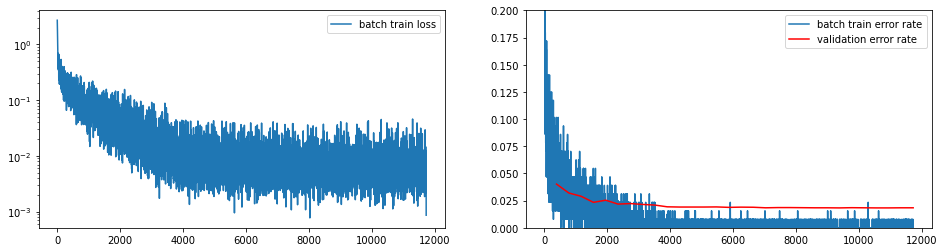

In [ ]:
class Model(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Model, self).__init__()
        self.layers = nn.Sequential(*args, **kwargs)

    def forward(self, X):
        X = X.view(X.size(0), -1)
        return self.layers.forward(X)

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)


model = Model(
    nn.Linear(28 * 28, 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
    )

def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform(m.weight)

with torch.no_grad():
    model.apply(init_weights)
    # Initialize parameters
    for name, p in model.named_parameters():
        # print(name)
        if "weight" in name:
            # if "layers.0" in name:
            # p.normal_(0, 0.5)
            # print(p)
            # elif
            pass
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# print(hamburgefonsz)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, epsilon=0.5, device="cuda")
SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, mu=0.90, device="cuda")


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

## Problem 4 answer

----------------------------------------------------------
After epoch 20 | valid err rate:  1.16% | doing  20 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 13)

-------------------------------------------
Test error rate: 1.050%, training took 19s.
-------------------------------------------


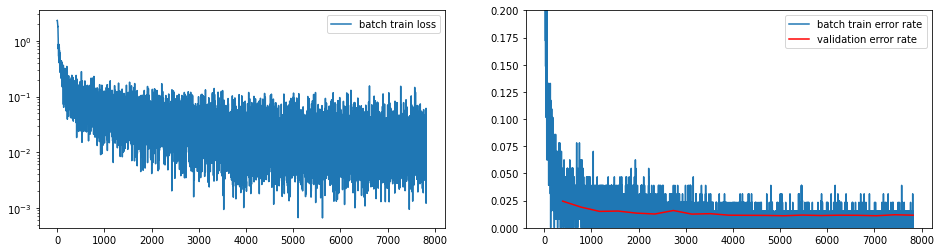

In [ ]:
class Model(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Model, self).__init__()
        self.layers = nn.Sequential(*args, **kwargs)

    def forward(self, X):
        return self.layers.forward(X)

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

model = Model(
    nn.Conv2d(1, 12, 3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(12, 24, 3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Flatten(),
    nn.Linear(600, 10),
    # nn.Sigmoid()
    )

# def init_weights(m):
#     if type(m) == nn.Linear:
#         torch.nn.init.xavier_uniform(m.weight) # TODO

with torch.no_grad():
    # model.apply(init_weights)
    # Initialize parameters
    for name, p in model.named_parameters():
        print(name)
        if "weight" in name:
            # Conv2 weights initialized in __init__
            # TODO
            # if "layers.0" in name:
            # p.normal_(0, 0.5)
            # print(p)
            # elif
            pass
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
# SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, epsilon=0.5, device="cuda")
SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, mu=0.9, device="cuda")


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

## Problem 5 answer

In [ ]:
def lr_scheduler(epoch):
  return 0.15 * ((0.5) ** (epoch // 10))

----------------------------------------------------------
After epoch 40 | valid err rate:  1.08% | doing  55 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 36)

-------------------------------------------
Test error rate: 1.140%, training took 51s.
-------------------------------------------


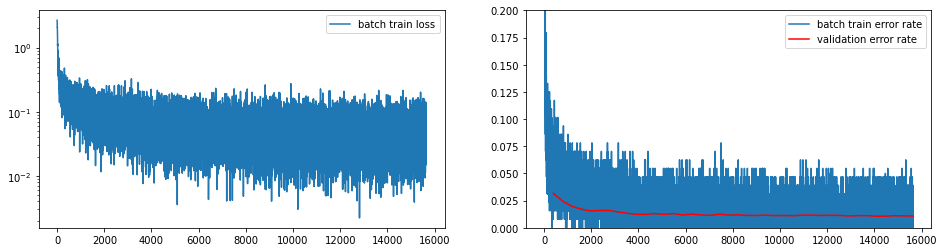

In [ ]:
class Model(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Model, self).__init__()
        self.layers = nn.Sequential(*args, **kwargs)

    def forward(self, X):
        # print(self.layers.forward(X).shape)
        # raise BaseException
        return self.layers.forward(X)

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

model = Model(
    nn.Conv2d(1, 25, 3),
    nn.Dropout2d(p=0.25),
    # # nn.Dropout(p=0.15),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2), # torch.Size([128, 48, 8, 8])
    nn.Conv2d(25, 32, 3),
    nn.Dropout2d(p=0.25),
    # # nn.Dropout(p=0.15),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3),
    # nn.Conv2d(32, 32, 3),
    # # nn.Dropout2d(p=0.20),
    # # # nn.Dropout(p=0.15),
    # nn.ReLU(),
    # nn.MaxPool2d(kernel_size=2),
    nn.Flatten(),
    nn.Linear(288, 10),
    )

def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform(m.weight) # TODO

with torch.no_grad():
    model.apply(init_weights)
    # Initialize parameters
    for name, p in model.named_parameters():
        # print(name)
        if "weight" in name:
            # TODO
            # if "layers.0" in name:
            # p.normal_(0, 0.5)
            # print(p)
            # elif
            pass
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=40, mu=0.8, device="cuda", lr_scheduler=lr_scheduler)


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

## Problem 6

In [ ]:
# import matplotlib.pyplot as plt

# for x, y in mnist_loaders["train"]:
#   # print(x)
#   for x in x:
#     plt.imshow(x.cpu()[0], cmap='gray')
#     # plt.imshow(x, cmap='gray', vmin=0.0, vmax=1.0)
#     plt.show()
#   print()
#   print(y)
#   break

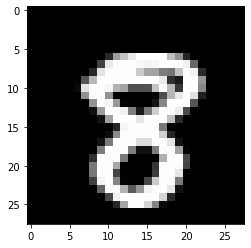

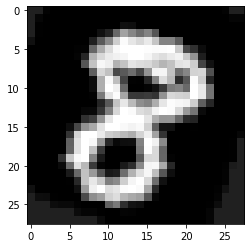


tensor(8, device='cuda:0')


In [ ]:
import matplotlib.pyplot as plt

for x, y in mnist_loaders["train"]:
  # print(x)
  for x in x:
    x = x.cpu()
    plt.imshow(x[0], cmap='gray')
    plt.show()
    transform = torchvision.transforms.Compose([
        torchvision.transforms.RandomRotation(20),
          torchvision.transforms.RandomResizedCrop(28, scale=(0.85, 1.0)),
        # torchvision.transforms.RandomResizedCrop(28),
    ])
    plt.imshow(transform(x)[0], cmap='gray')
    plt.show()
    break
  print()
  print(y[0])
  break

In [ ]:
augmented_mnist_loaders = {
    "train": InMemDataLoader(_train, batch_size=batch_size, shuffle=True, data_augmentation=True),
    "valid": InMemDataLoader(_valid, batch_size=batch_size, shuffle=False),
    "test": InMemDataLoader(_test, batch_size=batch_size, shuffle=False),
}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


----------------------------------------------------------
After epoch 25 | valid err rate:  1.00% | doing  25 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 16)

-------------------------------------------
Test error rate: 0.990%, training took 60s.
-------------------------------------------


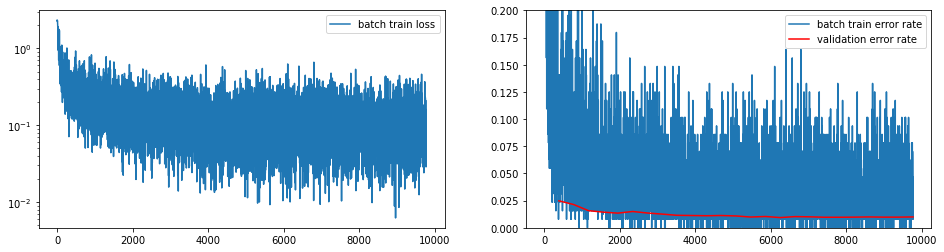

In [ ]:
class Model(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Model, self).__init__()
        self.layers = nn.Sequential(*args, **kwargs)

    def forward(self, X):
        # print(self.layers.forward(X).shape)
        # raise BaseException
        return self.layers.forward(X)

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

model = Model(
    nn.Conv2d(1, 25, 2),
    nn.Dropout2d(p=0.2),
    # nn.Dropout(p=0.15),
    nn.ReLU(),
    # nn.MaxPool2d(kernel_size=3), # torch.Size([128, 48, 8, 8])
    nn.Conv2d(25, 25, 3),
    nn.Dropout2d(p=0.2),
    # nn.Dropout(p=0.15),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(25, 25, 3),
    nn.Dropout2d(p=0.2),
    # nn.Dropout(p=0.15),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Flatten(),
    nn.Linear(625, 10)
    )

def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform(m.weight) # TODO

with torch.no_grad():
    model.apply(init_weights)
    # Initialize parameters
    for name, p in model.named_parameters():
        # print(name)
        if "weight" in name:
            # TODO
            # if "layers.0" in name:
            # p.normal_(0, 0.5)
            # print(p)
            # elif
            pass
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
SGD(model, augmented_mnist_loaders, alpha=1e-1, max_num_epochs=40, mu=0.8, device="cuda")


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

## Problem 7 answer

----------------------------------------------------------
After epoch 30 | valid err rate:  1.44% | doing  43 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 28)

-------------------------------------------
Test error rate: 1.670%, training took 26s.
-------------------------------------------


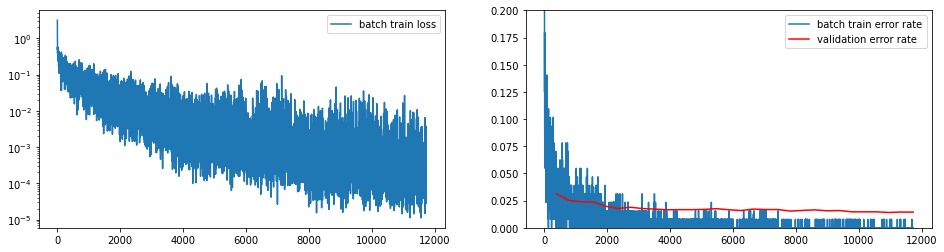

In [ ]:
# Problem 3 code with Batch Normalization added
# It seems to be slightly better

class Model(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Model, self).__init__()
        self.layers = nn.Sequential(*args, **kwargs)

    def forward(self, X):
        X = X.view(X.size(0), -1)
        return self.layers.forward(X)

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)


model = Model(
    nn.Linear(28 * 28, 200),
    nn.ReLU(),
    nn.BatchNorm1d(200),
    nn.Linear(200, 200),
    nn.ReLU(),
    nn.BatchNorm1d(200),
    nn.Linear(200, 10)
    )

def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform(m.weight)

with torch.no_grad():
    model.apply(init_weights)
    # Initialize parameters
    for name, p in model.named_parameters():
        if "weight" in name:
            pass
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)


# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, mu=0.9, device="cuda")


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))

----------------------------------------------------------
After epoch 30 | valid err rate:  0.86% | doing  35 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 23)

-------------------------------------------
Test error rate: 0.880%, training took 59s.
-------------------------------------------


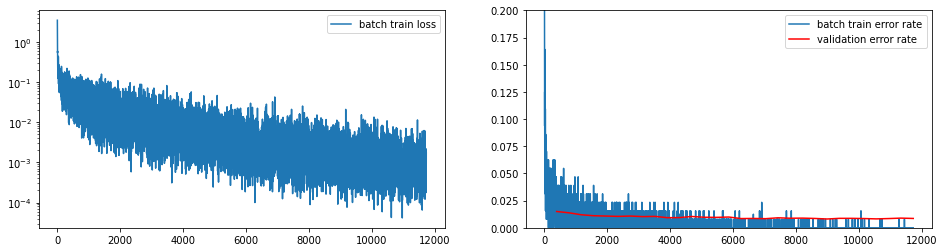

In [ ]:
# Problem 5 code with Batch Normalization added and Dropout removed
# It seems to be slightly better

class Model(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Model, self).__init__()
        self.layers = nn.Sequential(*args, **kwargs)

    def forward(self, X):
        # print(self.layers.forward(X).shape)
        # raise BaseException
        return self.layers.forward(X)

    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

model = Model(
    nn.Conv2d(1, 25, 2),
    # nn.Dropout2d(p=0.25),
    nn.ReLU(),
    nn.Conv2d(25, 25, 3),
    # nn.Dropout2d(p=0.25),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.BatchNorm2d(25),
    nn.Conv2d(25, 25, 3),
    # nn.Dropout2d(p=0.25),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Flatten(),
    nn.BatchNorm1d(625),
    nn.Linear(625, 10)
    )

def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform(m.weight) # TODO

with torch.no_grad():
    model.apply(init_weights)
    # Initialize parameters
    for name, p in model.named_parameters():
        # print(name)
        if "weight" in name:
            # TODO
            pass
        elif "bias" in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

# On GPU enabled devices set device='cuda' else set device='cpu'
t_start = time.time()
SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, mu=0.8, device="cuda")


test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))